In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import requests 
import bs4 
import textblob

In [3]:
wiki = requests.get("https://en.wikipedia.org/wiki/India")

In [4]:
from bs4 import BeautifulSoup as bs

In [5]:
india = bs(wiki.content , "lxml")  #lxml is parser used in html for wiki pedia

In [6]:
india = india.getText(strip= True)  #strip: If True, strings will be stripped before being concatenated.

In [7]:
import re   #regular expression

In [8]:
#digit removal within brackets 
india = re.sub(r'\[\d+\]' , "" , india)

In [9]:
india = re.sub(r'\[\w+\]' , "" , india)
#india = "This is a test string with [123] and [abc] and more text."
#This is a test string with  and  and more text.

In [10]:
india = re.sub('[0-9]' , "" , india)

In [11]:
#from string import punctuation
#temp = []
#for i in india:
#    if i not in punc:
#        temp.append(i)
#india = "".join(temp)
#print(india)

In [12]:
from nltk.tokenize import sent_tokenize

In [13]:
sent = sent_tokenize(india)
len(sent)

828

In [14]:
sent

["India - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)EtymologyHistoryToggle History subsection.Ancient India.Medieval India.Early modern India.Modern IndiaGeographyBiodiversityPolitics and governmentToggle Politics and government subsection.Politics.Government.Administrative divisions..States..Union territoriesForeign, economic and strategic relationsEconomyToggle Economy subsection.Industries.Energy.Socio-economic challengesDemographics, languages and religionCultureToggle Culture subsection.Visual art.Architecture.Literature.Performing arts and media.Society.Education.Clothing.Cuisine.Sports and recreationSee alsoNotesReferencesBibliographyExternal linksT

for sentiment analysis

In [15]:
#from textblob import TextBlob

In [17]:
'''def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity==0:
        return 'neutral'
    else:
        return 'negative'''

"def analyze_sentiment(tweet):\n    analysis=TextBlob(tweet)\n    if analysis.sentiment.polarity>0:\n        return 'positive'\n    elif analysis.sentiment.polarity==0:\n        return 'neutral'\n    else:\n        return 'negative"

In [18]:
#sentence = pd.DataFrame(sent)

In [19]:
#sentence.columns=["sent"]

In [20]:
#sentence["sentiment"] = [str(analyze_sentiment(x)) for x in sentence.sent]

In [21]:
#sentence.sentiment.value_counts()

Tokenization

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
indiawords = word_tokenize(india)

In [24]:
indiawords = [word for word in indiawords if word.isalnum() ]
#filters out any non-alphanumeric words from the list indiawords

In [25]:
from nltk.corpus import stopwords

In [26]:
stop_words = set(stopwords.words("english"))

In [27]:
indiawords = [word for word in indiawords if not str.lower(word) in stop_words]

In [42]:
indiawords = [word.lower() for word in indiawords]

In [43]:
from nltk.probability import FreqDist

In [44]:
wordfreq = FreqDist(indiawords)
#counting occurancy or frequency of words in indiawords
len(wordfreq)

5729

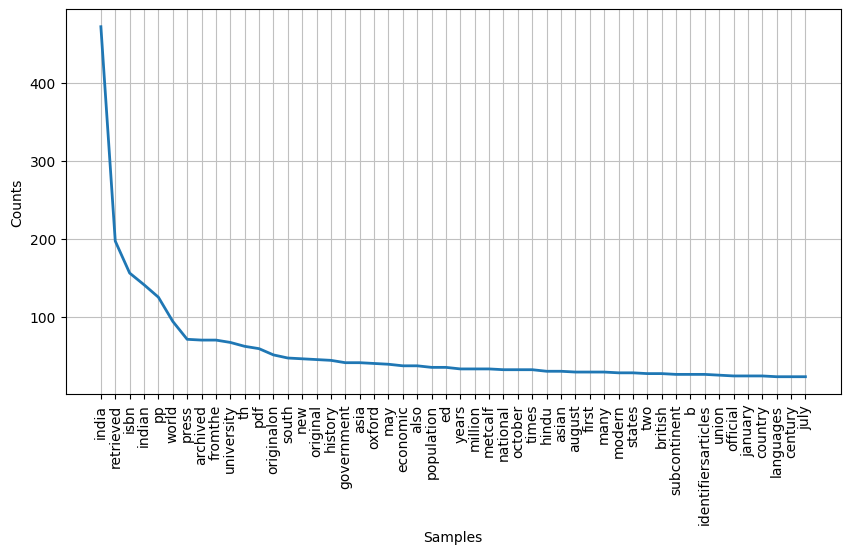

<Axes: xlabel='Samples', ylabel='Counts'>

In [45]:
plt.figure(figsize=(10,5))          #50 is for how to wordfreqs we are taking as argument
wordfreq.plot(50,cumulative=False)  #or top 50 words based on their frequencies


In [46]:
from wordcloud import WordCloud

In [47]:
india_words = "".join(indiawords)

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(india_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

KeyboardInterrupt: 